In [124]:
import matplotlib.pyplot as plt
import pandas
import pynumdiff
import seaborn as sns
import figurefirst as fifi
import math

In [125]:
def get_lat_lon_scale(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d*1000 # in meters

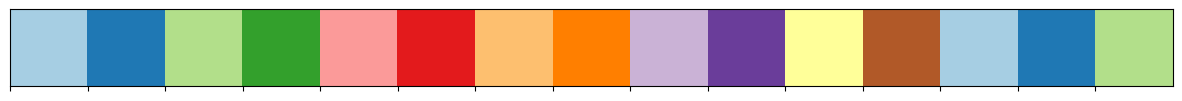

In [27]:
# colors

# Save a palette to a variable:
color_p = 'Paired'
color_range = 15
palette = sns.color_palette(color_p,color_range)

# Use palplot and pass in the variable:
sns.palplot(palette)

groomer_color = sns.color_palette(color_p,color_range)[1]
icy_color = sns.color_palette(color_p,color_range)[4]
powder_color = sns.color_palette(color_p,color_range)[5]
slushy_color = sns.color_palette(color_p,color_range)[9]

In [28]:
# Big bonanza

In [41]:
fnames = ['DATA/df_grmr.hdf',
          'DATA/df_grmr2.hdf',
          'DATA/df_grmr3.hdf',
          'DATA/df_grmr4.hdf', 
          'DATA/df_grmr5.hdf',
          'DATA/df_icy.hdf',
          'DATA/df_pwdr.hdf', 
          'DATA/df_pwdr1.hdf']

In [42]:
elevation_fnames = []
for fname in fnames:
    efname = fname[0:-4] + '_elevation.hdf'
    elevation_fnames.append(efname)

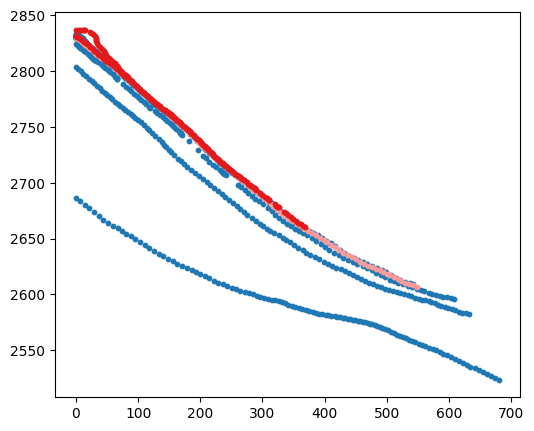

In [43]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

for fname in elevation_fnames:
    try:
        df = pandas.read_hdf(fname)
    except:
        continue
        
    if 'grmr' in fname:
        color = groomer_color
    elif 'icy' in fname:
        color = icy_color
    elif 'pwdr' in fname:
        color = powder_color
    elif '_s' in fname:
        color = slushy_color
        
    ax.scatter(df.distance, df.elevation, s=10, color=color)

In [32]:
# silver dollar

In [33]:
fnames = ['DATA/df_grmr1.hdf',
          'DATA/df_s.hdf',
          'DATA/df_s1.hdf', 
          'DATA/df_s2.hdf',
          'DATA/df_s3.hdf']

elevation_fnames = []
for fname in fnames:
    efname = fname[0:-4] + '_elevation.hdf'
    elevation_fnames.append(efname)

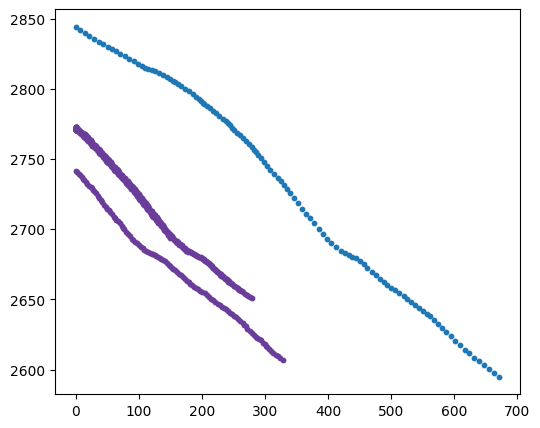

In [34]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

for fname in elevation_fnames:
    try:
        df = pandas.read_hdf(fname)
    except:
        continue
        
    if 'grmr' in fname:
        color = groomer_color
    elif 'icy' in fname:
        color = icy_color
    elif 'pwdr' in fname:
        color = powder_color
    elif '_s' in fname:
        color = slushy_color
        
    ax.scatter(df.distance, df.elevation, s=10, color=color)

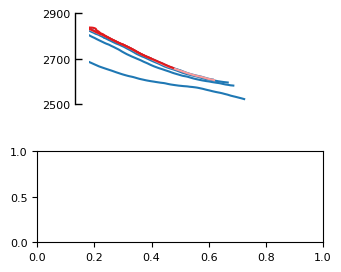

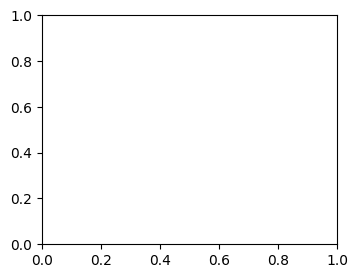

In [139]:
fnames = ['DATA/elevation_data/df_grmr.hdf',
          'DATA/elevation_data/df_grmr2.hdf',
          'DATA/elevation_data/df_grmr3.hdf',
          'DATA/elevation_data/df_grmr4.hdf', 
          'DATA/elevation_data/df_grmr5.hdf',
          'DATA/elevation_data/df_icy.hdf',
          'DATA/elevation_data/df_pwdr.hdf', 
          'DATA/elevation_data/df_pwdr1.hdf']
elevation_fnames = []
for fname in fnames:
    efname = fname[0:-4] + '_elevation.hdf'
    elevation_fnames.append(efname)

layout = fifi.svg_to_axes.FigureLayout('distance_elevation_figure/dist_v_ele_fig.svg', 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('dist_v_ele', 'big_bonanza')]


for fname in elevation_fnames:
    try:
        df = pandas.read_hdf(fname)
    except:
        continue
        
    if 'grmr' in fname:
        color = groomer_color
    elif 'icy' in fname:
        color = icy_color
    elif 'pwdr' in fname:
        color = powder_color
    elif '_s' in fname:
        color = slushy_color
        
    ax.plot(df.distance, df.elevation, color=color)
    
ax.set_aspect('equal')
fifi.mpl_functions.adjust_spines(ax, ['left'], yticks=[2900, 2700, 2500])
ax.set_ylim(2500, 2900)
ax.set_xlim(0, 800)
fifi.mpl_functions.set_fontsize(ax, 8)

In [140]:
fnames = ['DATA/elevation_data/df_grmr1.hdf',
          'DATA/elevation_data/df_s.hdf',
          'DATA/elevation_data/df_s1.hdf', 
          'DATA/elevation_data/df_s2.hdf',
          'DATA/elevation_data/df_s3.hdf']
elevation_fnames = []
for fname in fnames:
    efname = fname[0:-4] + '_elevation.hdf'
    elevation_fnames.append(efname)

ax = layout.axes[('dist_v_ele', 'silver_dollar')]


for fname in elevation_fnames:
    try:
        df = pandas.read_hdf(fname)
    except:
        continue
        
    if 'grmr' in fname:
        color = groomer_color
    elif 'icy' in fname:
        color = icy_color
    elif 'pwdr' in fname:
        color = powder_color
    elif '_s' in fname:
        color = slushy_color
        
    ax.plot(df.distance, df.elevation, color=color)
    
ax.set_aspect('equal')
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[2900, 2700, 2500], xticks=[0, 200, 400, 600, 800])
ax.set_ylim(2500, 2900)
ax.set_xlim(0, 800)
fifi.mpl_functions.set_fontsize(ax, 8)

In [141]:
layout.append_figure_to_layer(layout.figures['dist_v_ele'], 'dist_v_ele', cleartarget=True)
layout.write_svg('distance_elevation_figure/dist_v_ele_fig.svg')

In [ ]:
# all

In [52]:
fnames = ['DATA/elevation_data/df_grmr.hdf',
          'DATA/elevation_data/df_grmr1.hdf',
          'DATA/elevation_data/df_grmr2.hdf',
          'DATA/elevation_data/df_grmr3.hdf',
          'DATA/elevation_data/df_grmr4.hdf', 
          'DATA/elevation_data/df_grmr5.hdf',
          'DATA/elevation_data/df_icy.hdf',
          'DATA/elevation_data/df_pwdr.hdf', 
          'DATA/elevation_data/df_pwdr1.hdf',
          'DATA/elevation_data/df_s.hdf',
          'DATA/elevation_data/df_s1.hdf', 
          'DATA/elevation_data/df_s2.hdf',
          'DATA/elevation_data/df_s3.hdf']

elevation_fnames = []
for fname in fnames:
    efname = fname[0:-4] + '_elevation.hdf'
    elevation_fnames.append(efname)

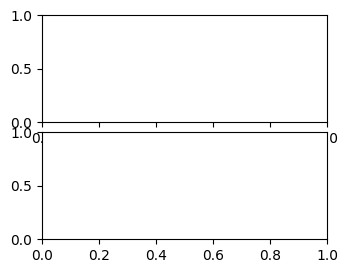

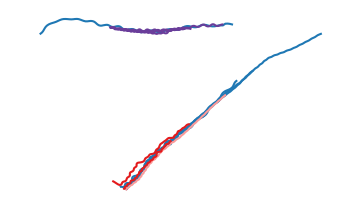

In [114]:
layout = fifi.svg_to_axes.FigureLayout('distance_elevation_figure/dist_v_ele_fig.svg', 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('ski_trajec_lat_lon', 'ski_trajec_lat_lon')]




for fname in elevation_fnames:
    try:
        df = pandas.read_hdf(fname)
    except:
        continue
        
    if 'grmr' in fname:
        color = groomer_color
    elif 'icy' in fname:
        color = icy_color
    elif 'pwdr' in fname:
        color = powder_color
    elif '_s' in fname:
        color = slushy_color
        
    ax.plot(df.lon, df.lat, color=color)
    
fifi.mpl_functions.adjust_spines(ax, [])
ax.set_xlim(-0.083 + -119.8, -0.071 + -119.8)
ax.set_ylim(0.0015  + 3.931e1, 0.009 + 3.931e1)
ax.set_aspect('equal')
layout.append_figure_to_layer(layout.figures['ski_trajec_lat_lon'], 'ski_trajec_lat_lon', cleartarget=True)
layout.write_svg('distance_elevation_figure/dist_v_ele_fig.svg')